In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mutual_info_score as mis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [3]:
df.shape

(20640, 10)

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.fillna(0, inplace=True)

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

New Column Creation

In [10]:
df['rooms_per_household'] = df.total_rooms / df.households
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
df['population_per_household'] = df.population / df.households

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [12]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

Question 1 - Ans is <1H OCEAN

In [13]:
numerical = list(df.dtypes.index[df.dtypes != 'object'])

In [14]:
corrM = df[numerical].corr()
corrM

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


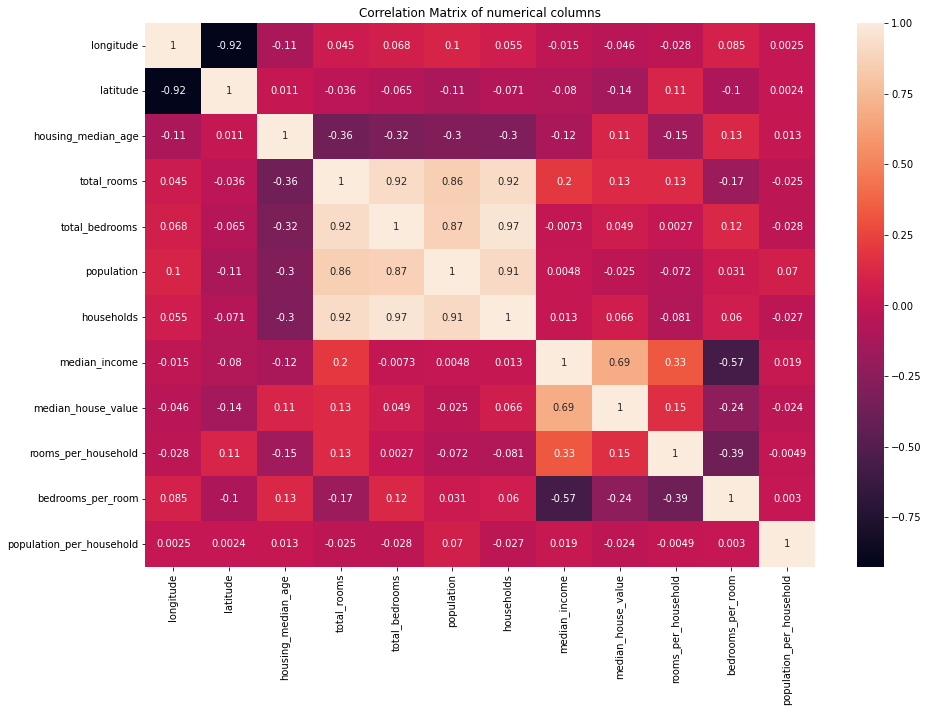

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(corrM, annot=True)
plt.title('Correlation Matrix of numerical columns')
plt.show()

Question 2 - Ans is total_bedrooms and households

In [16]:
data = df.copy()
mean_hv = data.median_house_value.mean()
mean_hv

206855.81690891474

In [17]:
data.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [18]:
data['above_average'] = (data.median_house_value > mean_hv).astype(int)

In [19]:
data = data.drop('median_house_value', axis=1)

# Validation Framework

In [20]:
np.random.seed(42)
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_test), len(df_val)

(12384, 4128, 4128)

In [21]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.above_average.values
y_test = df_test.above_average.values
y_val = df_val.above_average.values

#del df_train['median_house_value']
#del df_test['median_house_value']
#del df_val['median_house_value']

In [22]:
def mutual_info_score(series):
    return mis(series, df_train.above_average)

In [23]:
cols = ['ocean_proximity']
mi = df_train[cols].apply(mutual_info_score)
round(mi.sort_values(ascending=False),2)

ocean_proximity    0.1
dtype: float64

Question 3 - Ans is 0.1

In [24]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

In [25]:
numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household',
             'bedrooms_per_room', 'population_per_household']
train_dicts = df_train[['ocean_proximity'] + numerical].to_dict(orient='records')
val_dicts = df_val[['ocean_proximity'] + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

In [26]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [27]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [28]:
y_pred = model.predict(X_val)
accuracy  = round(accuracy_score(y_val, y_pred),2)
accuracy

0.82

Question 4 - Ans is approximately 0.84

In [29]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

In [30]:
m_acc = accuracy

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household',
             'bedrooms_per_room', 'population_per_household', 'ocean_proximity']

for feature in features:
    extract = features.copy()
    print(feature)
    extract.remove(feature)

    train_dicts = df_train[extract].to_dict(orient='records')
    val_dicts = df_val[extract].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    p_accuracy  = (accuracy_score(y_val, y_pred))
    print(f"Difference in Accuracies: {m_acc-p_accuracy}, Current Accuracy: {p_accuracy}")

longitude
Difference in Accuracies: 0.002655038759689865, Current Accuracy: 0.8173449612403101
latitude
Difference in Accuracies: -0.0004941860465116354, Current Accuracy: 0.8204941860465116
housing_median_age
Difference in Accuracies: 0.0016860465116278478, Current Accuracy: 0.8183139534883721
total_rooms
Difference in Accuracies: -0.003401162790697687, Current Accuracy: 0.8234011627906976
total_bedrooms
Difference in Accuracies: -0.00582364341085273, Current Accuracy: 0.8258236434108527
population
Difference in Accuracies: 0.006046511627906925, Current Accuracy: 0.813953488372093
households
Difference in Accuracies: 0.0021705426356588564, Current Accuracy: 0.8178294573643411
median_income
Difference in Accuracies: 0.044079457364341046, Current Accuracy: 0.7759205426356589
rooms_per_household
Difference in Accuracies: -0.003643410852713247, Current Accuracy: 0.8236434108527132
bedrooms_per_room
Difference in Accuracies: -0.0031589147286822383, Current Accuracy: 0.8231589147286822
popu

Question 5 - Ans is total_bedrooms (-0.00582364341085273)

In [31]:
df['median_house_value'] = np.log1p(df.median_house_value)

In [32]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY,6.281853,0.172096,2.181467


In [33]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Ridge Regression

In [34]:
train_dict = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [35]:
alphas = [0, 0.01, 0.1, 1, 10]

for alpha in alphas:
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"Alpha: {alpha} - Accuracy Rounded: {round(accuracy, 3)}, Actual Accuracy: {accuracy}")

Alpha: 0 - Accuracy Rounded: 0.524, Actual Accuracy: 0.524063570701514
Alpha: 0.01 - Accuracy Rounded: 0.524, Actual Accuracy: 0.5240635707186291
Alpha: 0.1 - Accuracy Rounded: 0.524, Actual Accuracy: 0.5240635708812071
Alpha: 1 - Accuracy Rounded: 0.524, Actual Accuracy: 0.5240635725155536
Alpha: 10 - Accuracy Rounded: 0.524, Actual Accuracy: 0.5240635888333284


Question 6 - Ans is 0